# Ecuaciones no lineales

## ¿Qué son?

Llamamos ecuacion no lineal a cualquier ecuación en la que alguna de sus incógnitas no es de primer grado, involucra polinomios de segundo grado, raíces, exponenciales, funciones trigonométricas, logaritmos, etcétera.

## ¿Cuál es su solución?

El propósito de los métodos descritos en esta libreta es encontrar las raíces de la ecuación ingresada a cada método, definimos a una raíz $ x $ de una función $ f(x) $, de tal manera que $ f(x) = 0$

Exissten múltiples métodos como:
   * Gráfico
   * Bisectriz
   * Punto Fijo o Sucesiones Sucesivas
   * Newton Raphson
   * Falsa Posición
   * Secante




In [3]:
%matplotlib widget
import numpy as np
from numpy.linalg import norm
import sympy as sp
import matplotlib.pyplot as plt
from scipy import optimize
from IPython.display import Math,display
sp.init_printing(use_latex='mathjax')
import warnings
import math
import ipywidgets as widgets
#warnings.filterwarnings('error')
np.seterr(all='print')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Método Gráfico

### ¿Cómo funciona?

El método gráfico sirve para poder obtener una aproximación a $f(x)=0$ al graficar la función y tomar nota de cuando se cruza el eje de las abscisas $x$, observando para qué valores de $x$, $f(x)=0$, cambiando el signo.

### ¿Cómo lo puedo usar?

Para usar este método, hay que ejecutar la **celda** de código siguiente e ingresar una función.

El formato de funciones aceptado en esta libreta es el siguiente:
   * Para representar productos $3x$ hay que ingresar ```3*x```
   * Para representar funciones trigonométricas $sen(x)$ hay que usar ```sin(x)```, las demás permanecen igual
   * Para representar exponenciales $e^x$ hay que usar ```exp(x)``` salvo un caso en específico que se detalla adelante.
   * Para representar potencias $x^2$ hay que usar ```x^2```
   
Un ejemplo de una ecuación ingresada sería $3x-sin(x)+e^x$ es: ```3*x -sin(x)+exp(x)```

Posterior a ingresar la función, se tendrá que especificar el rango de valores a evaluar en $f(x)$, a continuación se obtendrá la gráfica de $f(x)$ y se marcarán en rojo los puntos donde se realiza el cambio de signo.

Ingrese la función:  2*x


<IPython.core.display.Math object>

Ingrese el límite inferior del rango a evaluar:  2
Ingrese el límite mayor del rango a evaluar:  5


Rango establecido de 2.0 a 5.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
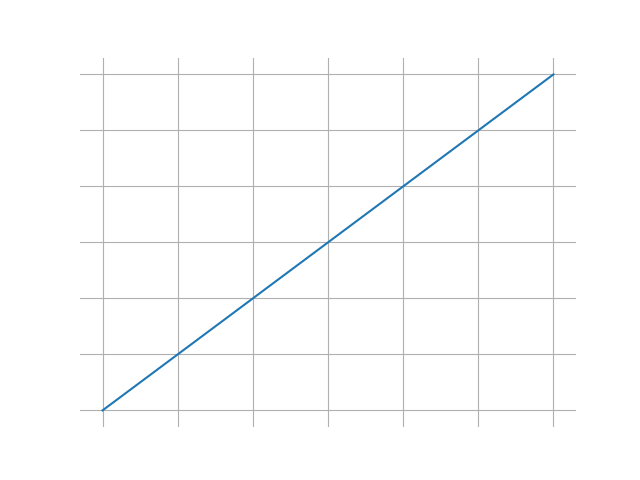

In [4]:
x, y, z = sp.symbols("x y z")
fun_graf = input('Ingrese la función: ')
fun_sim_graf = sp.sympify(fun_graf)
display(Math(sp.latex(fun_sim_graf)))
check_graf = True

menor_graf = float(input("Ingrese el límite inferior del rango a evaluar: "))
mayor_graf = float(input("Ingrese el límite mayor del rango a evaluar: "))
rango_graf = np.arange(menor_graf, (mayor_graf+1))
f_np_graf = sp.lambdify(x, fun_sim_graf, "numpy")
resultado_np_graf = f_np_graf(rango_graf) 
signs = np.sign(resultado_np_graf)
signs[signs == 0] = -1
cruces_cero_graf = np.where(np.diff(signs))[0]
cambio = []  
anterior_cambio = [] 

for a in range(len(cruces_cero_graf)):
    temporal = cruces_cero_graf[a]
    anterior_cambio.append(resultado_np_graf[temporal])
    cambio.append(resultado_np_graf[temporal+1])

rango_nuevo = []
print("Rango establecido de", menor_graf, "a", mayor_graf)
for a in range(0, len(cruces_cero_graf)):
    print("Para x en: ", rango_graf[cruces_cero_graf[a]],
          ", f(x) vale: ", anterior_cambio[a])
    print("Para x en: ", rango_graf[cruces_cero_graf[a]+1],
          ", f(x) vale: ", cambio[a], " cambio de signo")
    rango_nuevo.append(rango_graf[cruces_cero_graf[a]+1])
if(len(cruces_cero_graf) == 1):
    print("Se recomienda aumentar el rango de evaluación")

positivos = [] 
negativos = [] 

for i in range(int(menor_graf), int(mayor_graf)):
    if f_np_graf(i) > 0:
        if f_np_graf(i) in cambio:
            positivos.append(i)
        elif f_np_graf(i) in anterior_cambio:
            positivos.append(i)
    else:
        if f_np_graf(i) in cambio:
            negativos.append(i)
        elif f_np_graf(i) in anterior_cambio:
            negativos.append(i)

fig = plt.figure()
ax = plt.gca()  # get current axis
ax.plot(rango_graf, resultado_np_graf)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.plot(rango_nuevo, cambio, 'ro', label='Plot pogi')
plt.show()

## Bisectriz

### ¿Cómo funciona?

Una bisectriz es una recta que corta los puntos de un plano de  tal manera que el lugar de corte sea equidistante a los extremos del plano, dividiendo siempre a la mitad.

Es un proceso iterativo que se repite hasta encontrar un cambio de signo, obteniendo una mejor aproximación a la raíz.

Su fórmula es $x = \dfrac{a+b}{2}$


Donde $a$ es el valor donde se encuentra el signo positivo y $b$ el valor donde se encuentra el signo negativo.

### ¿Cómo lo puedo usar?

Para usar el método de la bisectriz es necesario haber encontrado los puntos donde se cruza x, basándose en el método gráfico. Es **imperante** ejecutar el método anterior para encontrar la tabla de valores

In [6]:
if check_graf:
    for i in range(len(positivos)):
        a = positivos[i]  # a siempre es donde se comporta positivo
        b = negativos[i]  # b siempre es donde se comporta negativo
        root = optimize.bisect(f_np_graf, a, b)
        print("La raíz entre a:", a, "y b:", b, "es:", root)
else:
    print("La función ingresada no se puede resolver por este método")

## Punto Fijo

Hay que usar e^x para el exponencial

In [8]:
### import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from mpmath import findroot
def integral_iterar(integral,a,b,n):
    h = (b-a)/n
    afuera = h/2
    primer_termino = integral(a)
    terminos_sumatoria = []
    for i in range (1,n):
        i_h = i*h
        a_sumada = a + i_h
        termino_suma = integral(a_sumada)
        terminos_sumatoria.append(termino_suma)
    segundo_termino_sin_sumar = np.multiply(2, terminos_sumatoria)
    segundo_termino_sumado = np.sum(segundo_termino_sin_sumar)
    tercer_termino = integral(b)
    suma_interna = primer_termino + segundo_termino_sumado + tercer_termino
    resultado = afuera * suma_interna
    print("x = ",x)
    return resultado
x, y, z = sp.symbols("x y z")
funcion_string = input("Ingrese la función a integrar")
funcion_sp = sp.sympify(funcion_string)
display(Math(sp.latex(funcion_sp)))
funcion_integrar_np = sp.lambdify(x,funcion_sp, "numpy")
a = float(input("Ingrese el límite inferior del rango de evaluación"))
b = float(input("Ingrese el límite superior del rango de evaluación"))
n = int(input("Ingrese el número de subintervalos de la integral"))
resultado = integral_iterar(funcion_integrar_np,a,b,n )
#cambiar el nombre de la función
print("El resultado de la integral es: ",resultado)


Ingrese la función a integrar 2*x


<IPython.core.display.Math object>

Ingrese el límite inferior del rango de evaluación 2
Ingrese el límite superior del rango de evaluación 5
Ingrese el número de subintervalos de la integral 2


x =  x
El resultado de la integral es:  21.0


## Punto Fijo

Hay que usar e^x para el exponencial

In [12]:
def listToString(s):

    # initialize an empty string
    str1 = ""

    # return string
    return (str1.join(s))


def punto_fijo(f, e=0.00001):
    max_iter = 100
    error = 1
    x_start = 0
    i = 0
    xp = []
    while (error > e and i < max_iter):
        x_result = f(x_start)
        resultado = x_result[0]
        error = abs(resultado - x_start)
        x_start = resultado
        x_real = x_start.real
        xp.append(x_start)
        i += 1
        if(np.isnan(resultado)):
            print("Error interno del programa")
            print("Intenta con el otro despeje")
            break
        else:
            print("Iteración: " + str(i) + " Resultado: " +
              str(x_real) + " Error: {:.10f}".format(round(error, 10)))

    print("El resultado del método es:", resultado)


w, x, y, z = sp.symbols("w x y z")
decision = int(input('Para dejar que el sistema despeje su ecuación ingrese 1, de lo contrario ingrese 2 y su ecuación ya despejada. Mejores resultados para la ecuación despejada por el usuario'))
if decision == 1:
    fun_pto = input('Ingrese la función: ')
    fun_sim_pto = sp.sympify(fun_pto)
    display(Math(sp.latex(fun_sim_pto)))

    #código para poder separar la ecuación en variables
    #tomamos el string del usuario, lo pasamos a una lista e iteramos buscando las x, sustituyendolas en la lista
    #pasandolas a string de nuevo y luego a funciones simbólicas
    #no es lo más eficiente pero es la implementaicón que se me ocurrió
    fun_sim_W = sp.sympify(fun_pto)
    fun_sim_Y = sp.sympify(fun_pto)
    fun_sim_Z = sp.sympify(fun_pto)
    contador = 0
    lista_fun_pto = list(fun_pto)
    listaCopia = list(fun_pto)
    listaCopia2 = list(fun_pto)
    listaCopia3 = list(fun_pto)
    for elemento in range(len(lista_fun_pto)):
        if lista_fun_pto[elemento] == 'x':
            if contador == 0:
                listaCopia[elemento] = 'w'
                exp = listToString(listaCopia)
                fun_sim_W = sp.sympify(exp)
                contador += 1
            elif contador == 1:
                listaCopia2[elemento] = 'y'
                exp = listToString(listaCopia2)
                fun_sim_Y = sp.sympify(exp)
                contador += 2
                break
            elif contador == 2:
                listaCopia3[elemento] = 'z'
                exp = listToString(listaCopia3)
                fun_sim_Z = sp.sympify(exp)
            else:
                print('Demasiadas x')


    ecuaciones = []
    if(fun_sim_W != fun_sim_pto):
        despejadaW = sp.solve(fun_sim_W, w)
        ecuaciones.append(despejadaW)
    if(fun_sim_Y != fun_sim_pto):
        despejadaY = sp.solve(fun_sim_Y, y)
        ecuaciones.append(despejadaY)
    if(fun_sim_Z != fun_sim_pto):
        despejadaZ = sp.solve(fun_sim_Z, z)
        ecuaciones.append(despejadaZ)

    print("Despejes de la ecuación para x:\n")
    for ecuacion in ecuaciones:
        display(Math(sp.latex(ecuacion)))

    opcion = int(input("¿Qué despeje desea usar?")) - 1
    despeje = ecuaciones[opcion]
    funcion_np_pto = sp.lambdify(x, despeje, 'numpy')
    punto_fijo(funcion_np_pto)
elif decision == 2:
    fun_pto = input('Ingrese la función: ')
    fun_sim_pto = sp.sympify(fun_pto)
    display(Math(sp.latex(fun_sim_pto)))
    funcion_np_pto = sp.lambdify(x, funcion_sim_pto, 'numpy')
    punto_fijo(funcion_np_pto)


Para dejar que el sistema despeje su ecuación ingrese 1, de lo contrario ingrese 2 y su ecuación ya despejada. Mejores resultados para la ecuación despejada por el usuario 1
Ingrese la función:  e^x


<IPython.core.display.Math object>

Despejes de la ecuación para x:



<IPython.core.display.Math object>

¿Qué despeje desea usar? 2


IndexError: list index out of range

## Newton Raphson

Hay que usar exp(x) para el exponencial

In [37]:
def newton_raphson(func,func_prime,x_0,error=0.000001):
    maxiter = 100
    e = 1 
    i = 0
    while(i<maxiter and e>error):
        res = func(x_0)#.evalf
        res_prime = func_prime(x_0)#.evalf
        #res_prime=float(res)
        x = x_0 - (res/res_prime)
        resultado = x
        e_anterior = e
        e = abs(resultado-x_0)
        x_0 = resultado
        i+=1
        print("Iteración: " + str(i) + " Resultado: " + str(resultado) + " Error: " + str(e))
        if(e_anterior < e):
            print("La función parece comportarse de manera errática, resultados no garantizados")
            #i=100
    if(i==100):
        print("Número máximo de iteraciones alcanzado")
    print("El resultado es: " + str(resultado))


w, x, y, z = sp.symbols("w x y z")
fun_nwt = input('Ingrese la función: ')
fun_sim_nwt = sp.sympify(fun_nwt)
#converter()
display(Math(sp.latex(fun_sim_nwt)))
fun_prime_sim_nwt = fun_sim_nwt.diff(x)
print("Derivada de la función: ")
display(Math(sp.latex(fun_prime_sim_nwt)))
x_0 = float(input("Ingrese el valor inicial de x0: "))
fun_np_nwt = sp.lambdify(x,fun_sim_nwt,math)
fun_prime_np_nwt = sp.lambdify(x,fun_prime_sim_nwt,math)
newton_raphson(fun_np_nwt,fun_prime_np_nwt,x_0)



Ingrese la función:  0.8*(x^2)+x-3


<IPython.core.display.Math object>

Derivada de la función: 


<IPython.core.display.Math object>

Ingrese el valor inicial de x0:  1


Iteración: 1 Resultado: 1.4615384615384615 Error: 0.46153846153846145
Iteración: 2 Resultado: 1.4104927330733783 Error: 0.05104572846508315
Iteración: 3 Resultado: 1.409852675176783 Error: 0.0006400578965952697
Iteración: 4 Resultado: 1.409852574512466 Error: 1.0066431710420432e-07
El resultado es: 1.409852574512466


## Falsa posición

Hay que usar exp(x) para el exponencial

In [5]:
        
def regula_falsi(f,a,b,e=0.00001):
    if f(a) * f(b) >=0:
        print("Los valores seleccionados de a y b no son válidos para el método")
    else:
        max_iter = 100
        error = 1
        x_start = a - (b-a) * f(a) / (f(b)-f(a))
        a = x_start
        i = 0
        xp = []
        while (error > e and i < max_iter):
            resultado = a - (b-a) * f(a) / (f(b)-f(a))
            error = abs(resultado - a)
            a = resultado
            i += 1
            print("Iteración: " + str(i) + " Resultado: " +str(resultado) + " Error: {:.10f}".format(round(error, 10)))

        print("El resultado del método es:", resultado)


w, x, y, z = sp.symbols("w x y z")
fun_fp = input('Ingrese la función: ')
fun_sim_fp = sp.sympify(fun_fp)
#converter()
display(Math(sp.latex(fun_sim_fp)))
fun_np_fp = sp.lambdify(x, fun_sim_fp, 'numpy')
a = float(input("Ingrese el valor de a: "))
b = float(input("Ingrese el valor de b: "))
regula_falsi(fun_np_fp,a,b)


  

Ingrese la función:  exp(x)


<IPython.core.display.Math object>

Ingrese el valor de a:  5
Ingrese el valor de b:  6


Los valores seleccionados de a y b no son válidos para el método


## Secante:

Hay que usar exp(x) para el exponencial

In [14]:
def secante(f,x0,x1,e=0.00001):
    if(f(x0)*f(x1) >=0):
        print("Valores iniciales de 0 y 1 inválidos")
    else:
        maxiter = 100
        error = 1
        xi = x0
        xi_1 = x1
        xi_2 = xi_1 - (f(xi_1)*(xi_1-xi)/f(xi_1)-f(xi))
        xi=xi_1
        xi_1=xi_2
        i = 0
        while(error > e and i < maxiter):
            xi_2 = xi_1 - (f(xi_1)*(xi_1-xi)/f(xi_1)-f(xi))
            error = abs(f(xi_1))
            xi=xi_1
            xi_1=xi_2
            i+=1

            print("Iteración: " + str(i) + " Resultado: " +str(xi_1) + " Error: {:.10f}".format(round(error, 10)))
        print("El resultado del método es:", xi_1)
        
    

w, x, y, z = sp.symbols("w x y z")
fun_sc = input('Ingrese la función: ')
fun_sim_sc = sp.sympify(fun_sc)
#converter()
display(Math(sp.latex(fun_sim_sc)))
fun_np_sc = sp.lambdify(x, fun_sim_sc, 'numpy')
x0 = 0
x1 = 1
secante(fun_np_sc,x0,x1)

Ingrese la función:  2*x


<IPython.core.display.Math object>

Valores iniciales de 0 y 1 inválidos
